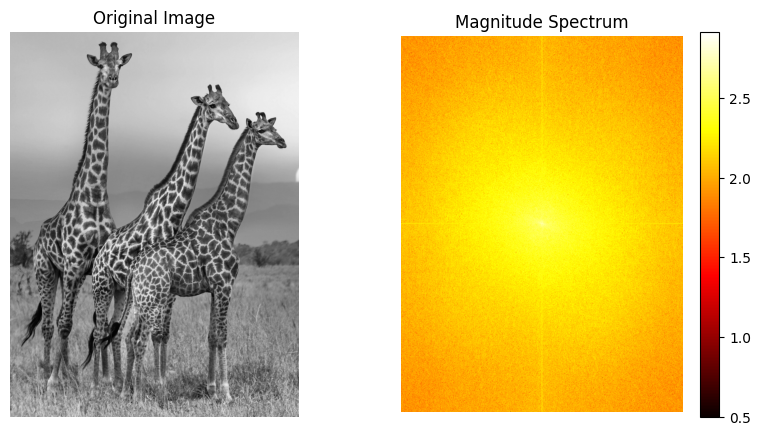

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image
image = Image.open('/content/giraffe.jpg').convert('L')  # Convert to grayscale

# Convert image to numpy array
image_array = np.array(image)

# Perform FFT
fft_result = np.fft.fft2(image_array)
fft_shifted = np.fft.fftshift(fft_result)  # Shift zero frequency components to the center

# Calculate magnitude spectrum
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)  # Add 1 to avoid log(0)

# Plot the results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 2, 2)
plt.imshow(np.log(magnitude_spectrum), cmap='hot')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.axis('off')

plt.show()


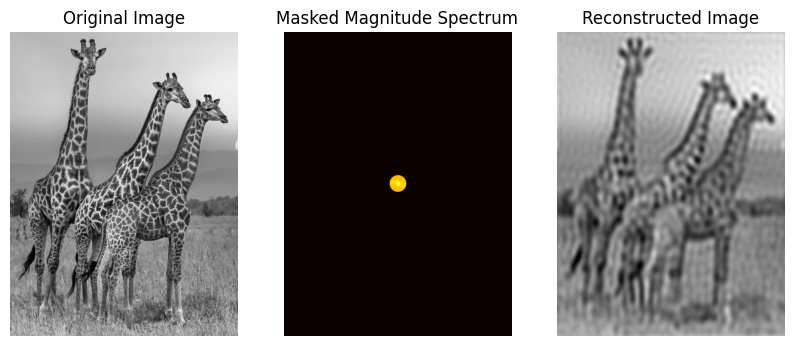

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image
image = Image.open('/content/giraffe.jpg').convert('L')  # Convert to grayscale

# Convert image to numpy array
image_array = np.array(image)

# Perform FFT
fft_result = np.fft.fft2(image_array)
fft_shifted = np.fft.fftshift(fft_result)  # Shift zero frequency components to the center

# Create a circular mask
rows, cols = image_array.shape
center_row, center_col = rows // 2, cols // 2
radius = 30  # Adjust the radius as needed

Y, X = np.ogrid[:rows, :cols]
mask = (X - center_col)**2 + (Y - center_row)**2 <= radius**2

# Apply the mask to the FFT spectrum
masked_fft = fft_shifted * mask

# Perform inverse FFT
ifft_shifted = np.fft.ifftshift(masked_fft)  # Shift zero frequency components back
reconstructed_image = np.fft.ifft2(ifft_shifted)
reconstructed_image = np.abs(reconstructed_image)  # Take the absolute value

# Plot the results
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Masked Magnitude Spectrum
plt.subplot(1, 3, 2)
masked_magnitude_spectrum = np.log(np.abs(masked_fft) + 1)
plt.imshow(masked_magnitude_spectrum, cmap='hot')
plt.title('Masked Magnitude Spectrum')
plt.axis('off')

# Reconstructed Image
plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()
